In [1]:
import pandas as pd
import numpy as np
import regex as re
import missingno

<AxesSubplot:>

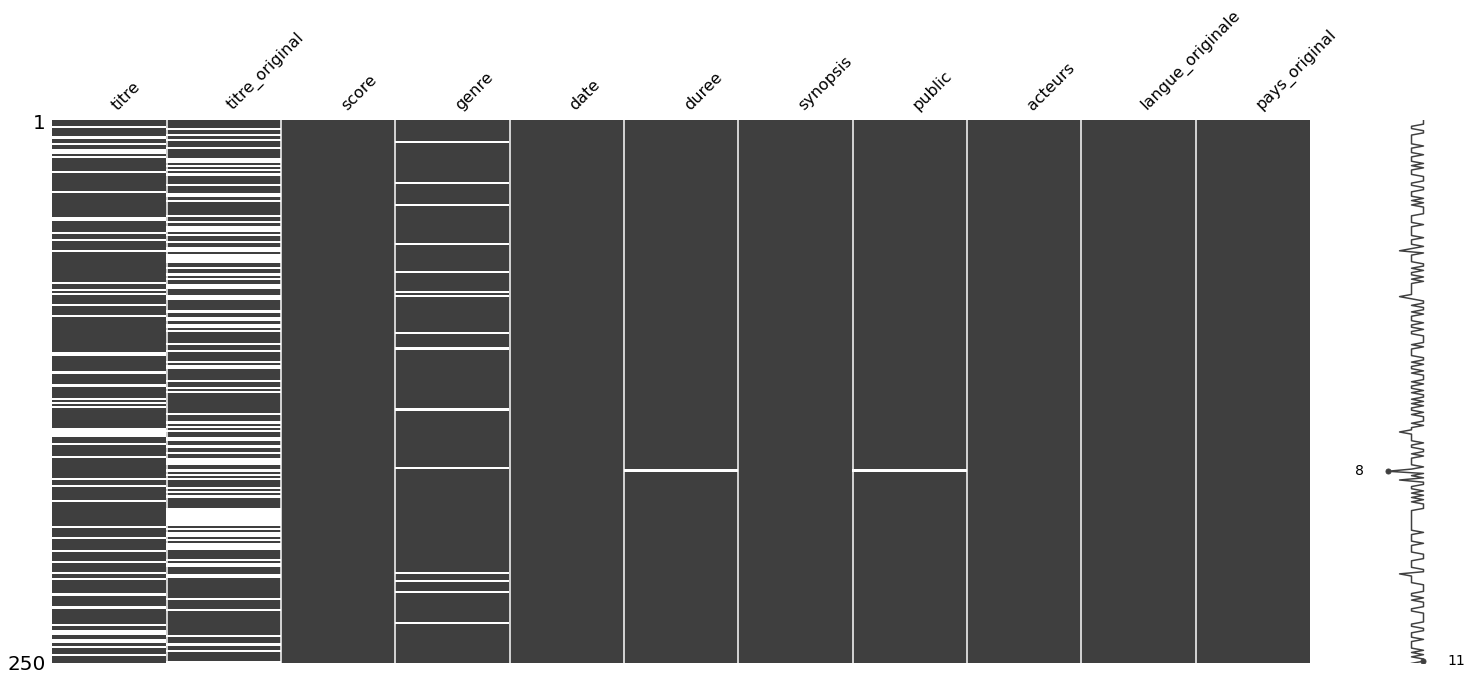

In [2]:

films_csv = pd.read_csv("films.csv")
missingno.matrix(films_csv)

In [3]:
time = films_csv["duree"].str.replace(" ", "")
time = time.str.replace("m", "")
time = time.str.replace(",", "")

time

0      2h26
1      1h56
2      2h22
3      1h35
4       2h2
       ... 
245    1h36
246    2h32
247    3h22
248    2h55
249    2h19
Name: duree, Length: 250, dtype: object

DUREE DU FILM EN MINUTES

In [4]:
heures = time.str.extract(r"(\d+)h")
minutes = time.str.extract(r'h(\d+)')
films_csv["duree"]

0      2,h, ,26,m
1      1,h, ,56,m
2      2,h, ,22,m
3      1,h, ,35,m
4       2,h, ,2,m
          ...    
245    1,h, ,36,m
246    2,h, ,32,m
247    3,h, ,22,m
248    2,h, ,55,m
249    2,h, ,19,m
Name: duree, Length: 250, dtype: object

In [5]:
films_csv['duree']=heures.astype("float", errors="ignore")*60 + minutes.astype("float", errors="ignore")
sum(films_csv['duree'].isnull())/len(films_csv)

0.028

In [6]:
type(films_csv['genre'][0])

str

In [7]:
mask = films_csv['genre'].str.contains('Horror')
sum(mask.isnull())

15

FILM LE PLUS LONG

In [8]:
films_csv.sort_values("duree",ascending=False)[0:1]

,titre,titre_original,score,genre,date,duree,synopsis,public,acteurs,langue_originale,pays_original
44,Gangs of Wasseypur,NaN,8.2,"Action,Comedy,Crime","June 22, 2012 (India)",321.0,A clash between Sultan and Shahid Khan leads t...,Tous publics avec avertissement,"Manoj Bajpayee,Richa Chadha,Nawazuddin Siddiqu...",Hindi,India


5 FILMS LES PLUS LONGS

In [9]:
films_csv.sort_values("duree",ascending=False)[0:5]

,titre,titre_original,score,genre,date,duree,synopsis,public,acteurs,langue_originale,pays_original
44,Gangs of Wasseypur,NaN,8.2,"Action,Comedy,Crime","June 22, 2012 (India)",321.0,A clash between Sultan and Shahid Khan leads t...,Tous publics avec avertissement,"Manoj Bajpayee,Richa Chadha,Nawazuddin Siddiqu...",Hindi,India
85,NaN,Original title: Gone with the Wind,8.1,"Drama,History,Romance","May 20, 1950 (France)",238.0,The manipulative daughter of a Georgia plantat...,Tous publics,"Clark Gable,Vivien Leigh,Thomas Mitchell,Barba...",English,United States
192,NaN,Original title: Once Upon a Time in America,8.3,"Crime,Drama","May 23, 1984 (France)",229.0,A former Prohibition-era Jewish gangster retur...,Tous publics,"Robert De Niro,James Woods,Elizabeth McGovern,...",English,Italy
159,Lawrence d'Arabie,Original title: Lawrence of Arabia,8.3,"Adventure,Biography,Drama","March 15, 1963 (France)",228.0,"The story of T.E. Lawrence, the English office...",Tous publics,"Peter O'Toole,Alec Guinness,Anthony Quinn,Jack...",English,United Kingdom
53,Ben-Hur,NaN,8.1,"Adventure,Drama,History","October 7, 1960 (France)",212.0,After a Jewish prince is betrayed and sent int...,Tous publics,"Charlton Heston,Jack Hawkins,Stephen Boyd,Haya...",English,United States


In [10]:
films_csv.sort_values("score",ascending=False)[0:5]

,titre,titre_original,score,genre,date,duree,synopsis,public,acteurs,langue_originale,pays_original
161,Jai Bhim,NaN,9.5,"Crime,Drama","November 1, 2021 (France)",NaN,When a tribal man is arrested for a case of al...,NaN,"Suriya,Lijo Mol Jose,Manikandan,Rajisha Vijaya...",Tamil,India
2,Les Évadés,Original title: The Shawshank Redemption,9.3,Drama,"March 1, 1995 (France)",142.0,Two imprisoned men bond over a number of years...,Tous publics,"Tim Robbins,Morgan Freeman,Bob Gunton,William ...",English,United States
248,Le Parrain,Original title: The Godfather,9.2,"Crime,Drama","October 18, 1972 (France)",175.0,The Godfather follows Vito Corleone Don of the...,12,"Marlon Brando,Al Pacino,James Caan,Diane Keato...",English,United States
19,Soorarai Pottru,NaN,9.1,Drama,"November 11, 2020 (France)",153.0,"Nedumaaran Rajangam ""Maara"" sets out to make t...",18,"Suriya,Paresh Rawal,Aparna Balamurali,Gaurav P...",Tamil,India
247,"Le Parrain, 2ᵉ partie",Original title: The Godfather: Part II,9.0,"Crime,Drama","August 27, 1975 (France)",202.0,The early life and career of Vito Corleone in ...,13,"Al Pacino,Robert De Niro,Robert Duvall,Diane K...",English,United States


NOMBRE DE FILMS AVEC MORGAN FREEMAN

In [11]:
(films_csv["acteurs"].loc[films_csv["acteurs"].str.contains(r"Morgan Freeman")]).count()

7

NOMBRE DE FILMS AVEC TOM CRUISE

In [12]:
(films_csv["acteurs"].loc[films_csv["acteurs"].str.contains(r"Tom Cruise")]).count()

0

TOP 3 FILM DRAMATIQUE

In [13]:
mask_drama = films_csv['genre'].str.contains('Drama', na=False)
(films_csv[mask_drama]).sort_values("score",ascending=False)[0:3]

,titre,titre_original,score,genre,date,duree,synopsis,public,acteurs,langue_originale,pays_original
161,Jai Bhim,NaN,9.5,"Crime,Drama","November 1, 2021 (France)",NaN,When a tribal man is arrested for a case of al...,NaN,"Suriya,Lijo Mol Jose,Manikandan,Rajisha Vijaya...",Tamil,India
2,Les Évadés,Original title: The Shawshank Redemption,9.3,Drama,"March 1, 1995 (France)",142.0,Two imprisoned men bond over a number of years...,Tous publics,"Tim Robbins,Morgan Freeman,Bob Gunton,William ...",English,United States
248,Le Parrain,Original title: The Godfather,9.2,"Crime,Drama","October 18, 1972 (France)",175.0,The Godfather follows Vito Corleone Don of the...,12,"Marlon Brando,Al Pacino,James Caan,Diane Keato...",English,United States


TOP 3 FILM COMIQUE

In [14]:
mask_comedy = films_csv['genre'].str.contains('Comedy', na=False)
(films_csv[mask_comedy]).sort_values("score",ascending=False)[0:3]

,titre,titre_original,score,genre,date,duree,synopsis,public,acteurs,langue_originale,pays_original
229,La vie est belle,Original title: La vita è bella,8.6,"Comedy,Drama,Romance","October 21, 1998 (France)",116.0,When an open-minded Jewish waiter and his son ...,Tous publics,"Roberto Benigni,Nicoletta Braschi,Giorgio Cant...",Italian,Italy
222,Parasite,Original title: Gisaengchung,8.6,"Comedy,Drama,Thriller","June 5, 2019 (France)",132.0,Greed and class discrimination threaten the ne...,Tous publics avec avertissement,"Kang-ho Song,Sun-kyun Lee,Yeo-jeong Cho,Woo-si...",Korean,South Korea
215,Retour vers le futur,Original title: Back to the Future,8.5,"Adventure,Comedy,Sci-Fi","October 30, 1985 (France)",116.0,"Marty McFly, a 17-year-old high school student...",Tous publics,"Michael J. Fox,Christopher Lloyd,Lea Thompson,...",English,United States


TOP 3 FILM HORREUR

In [15]:
mask_horror = films_csv['genre'].str.contains('Horror', na=False)
(films_csv[mask_horror]).sort_values("score",ascending=False)[0:3]

,titre,titre_original,score,genre,date,duree,synopsis,public,acteurs,langue_originale,pays_original
214,Psychose,Original title: Psycho,8.5,"Horror,Mystery,Thriller","November 2, 1960 (France)",109.0,"A Phoenix secretary embezzles $40,000 from her...",18,"Anthony Perkins,Janet Leigh,Vera Miles,John Ga...",English,United States
0,Shining,Original title: The Shining,8.4,"Drama,Horror","October 16, 1980 (France)",146.0,A family heads to an isolated hotel for the wi...,12,"Jack Nicholson,Shelley Duvall,Danny Lloyd,Scat...",English,United Kingdom
198,NaN,Original title: Alien,8.4,"Horror,Sci-Fi","September 12, 1979 (France)",117.0,After a space merchant vessel receives an unkn...,12,"Sigourney Weaver,Tom Skerritt,John Hurt,Veroni...",English,United Kingdom


POURCENTAGE DE FILMS AMERICAINS DANS LE TOP 100

In [16]:
#top 100 
top_100 = films_csv.sort_values("score",ascending=False)[0:100]
mask_americains = top_100['pays_original'].str.contains('United States')
print("pourcentage :",(sum(mask_americains)/len(films_csv))*100)


pourcentage : 21.6


POURCENTAGE DE FILMS FRANCAIS DANS LE TOP 100

In [17]:
mask_francais = top_100['pays_original'].str.contains('France')
print("pourcentage :",(sum(mask_francais)/len(films_csv))*100)

pourcentage : 0.8


<AxesSubplot:>

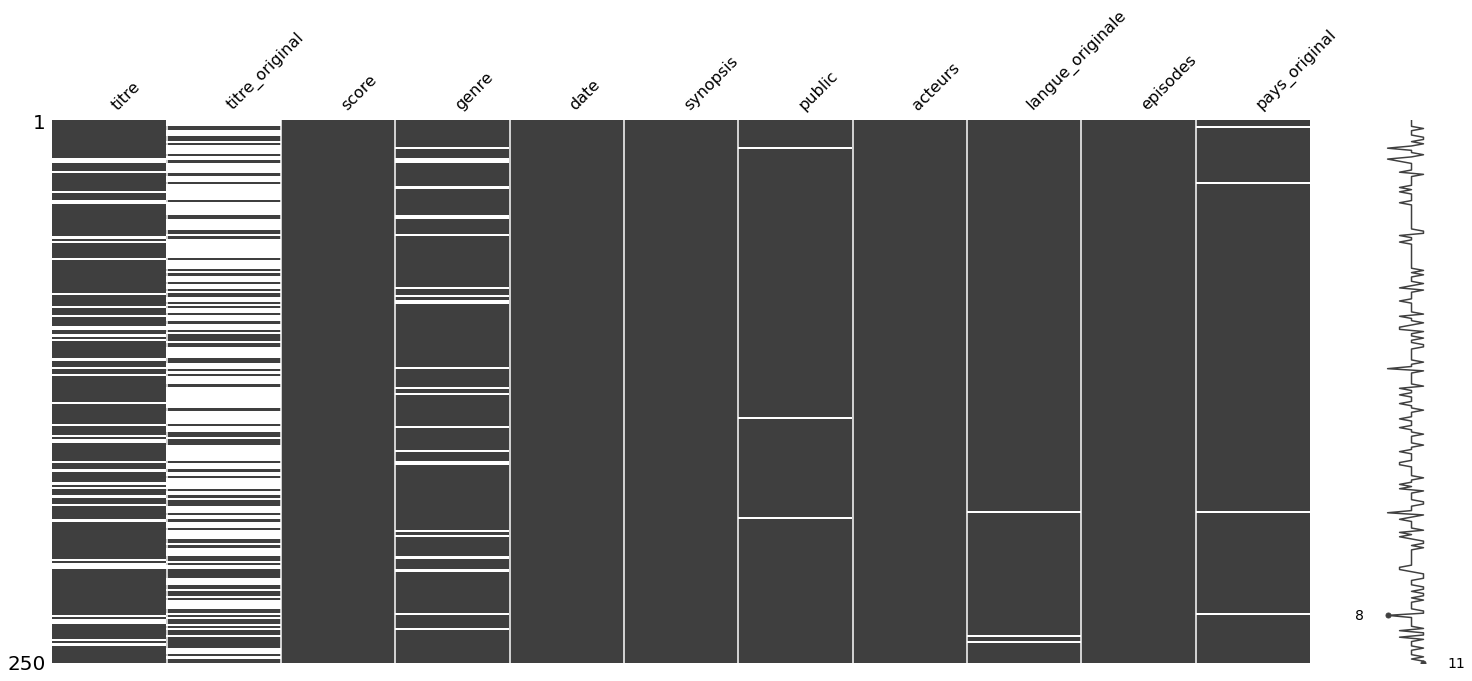

In [20]:
series_csv = pd.read_csv("series.csv")
missingno.matrix(series_csv)


In [ ]:
films_csv.columns

Index(['titre', 'titre_original', 'score', 'genre', 'date', 'duree',
       'synopsis', 'public', 'acteurs', 'langue_originale', 'pays_original'],
      dtype='object')